# <b><center><span style='color:darkblue'> Linear Regression Assignment </span></center>



## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## <span style='color:darkblue'> Importing Libraries</span>

In [1]:
import numpy as np
import pandas as pd
from numpy import percentile

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis
%matplotlib inline
from scipy import stats
import warnings # Supress warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

## <span style='color:darkblue'> Task 1: Exploratory Data Analysis on Application Data </span>

### <p> <span style="color : darkred"> <i> Subtask 1.1: Read the Application Data. </i> </span> 
<span style="color : purple"> Reading the bike sharing data file i.e., 'day.csv' and storing it in a dataframe "bike_data".</span> </p>

In [2]:
bike_data = pd.read_csv('day.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### <p><span style='color:darkred'> <i>Subtask 1.2: Data Sanity checks</i></span>

### <p><span style='color:darkred'> <i>Subtask 1.2.1: Inspect the Dataframe</i></span>
<span style="color : purple"> Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.</span></p>

In [3]:
def printCyan(message): print("\033[1m \033[36m {}\033[300m".format(message))
def printGreen(message): print("\033[1m \033[32m {}\033[00m".format(message))


printGreen("**"*120)
printCyan("Information of Dataframe: " )
printCyan(bike_data.info(verbose = True)) 

  ************************************************************************************************************************************************************************************************************************************************
  Information of Dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  cas

In [4]:
printGreen("Description of Dataframe: " )
printCyan(bike_data.describe())

  Description of Dataframe: 
            instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620

###### <span style="color : darkgreen"> <b>Observations: </b> </span>  
<br>
<span style="color : purple">
<ol><li> From data dictionary and columns inspection; we can conclude that casual, registered and cnt are target variables. Since business goal is to estimate total demand we can exclude the other columns.
</li> <li> Among the rest of columns we could visualize instant is record id, as being insignificant we may drop this as well.</li>
  </ol>
</span>

In [5]:
bike_data = bike_data.drop(["instant","casual","registered"], axis =1)
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### <p> <span style='color:darkred'> <i> Subtask 1.2.2 Identifying Missing Values</i>  </p> </span>

In [6]:
null  = bike_data.isnull().sum().sum()
printCyan(f"Null value count: {null}" )


  Null value count: 0


### <p> <span style="color : darkred"> <i> Subtask 1.2.3 Verifying Duplicate records </i></span></p>


In [7]:
printCyan("Duplicate Records count in Application Dataframe : {}".format(len(bike_data[bike_data.duplicated()])))


  Duplicate Records count in Application Dataframe : 0


### <p> <span style="color : darkred"> <i> Subtask 1.2.4 Data Types check </i></span></p>


In [8]:
#counting specify datatypes column count
printCyan(bike_data.dtypes.value_counts())

  int64      8
float64    4
object     1
dtype: int64


In [9]:
#verifying unique value count in each column
printCyan(bike_data.nunique())

  dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64


###### <span style="color : darkgreen"> <b>Observations: </b> </span>  
<br>
<span style="color : purple">
<ol><li>
   From the data dictionary we could conclude following columns are categorical in nature. Same could be found in unique record count.</li>
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
    <li> Since dteday information always available in mnth,yr,workday features. So let us drop dteday columns as well.</li>
    </ol>
</span>

In [10]:
bike_data.drop(["dteday"],axis=1,inplace= True)
printCyan(bike_data.head())


     season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600  


### <p> <span style="color : darkred"> <i> Subtask 1.3 Outlier Analysis </i></span></p>


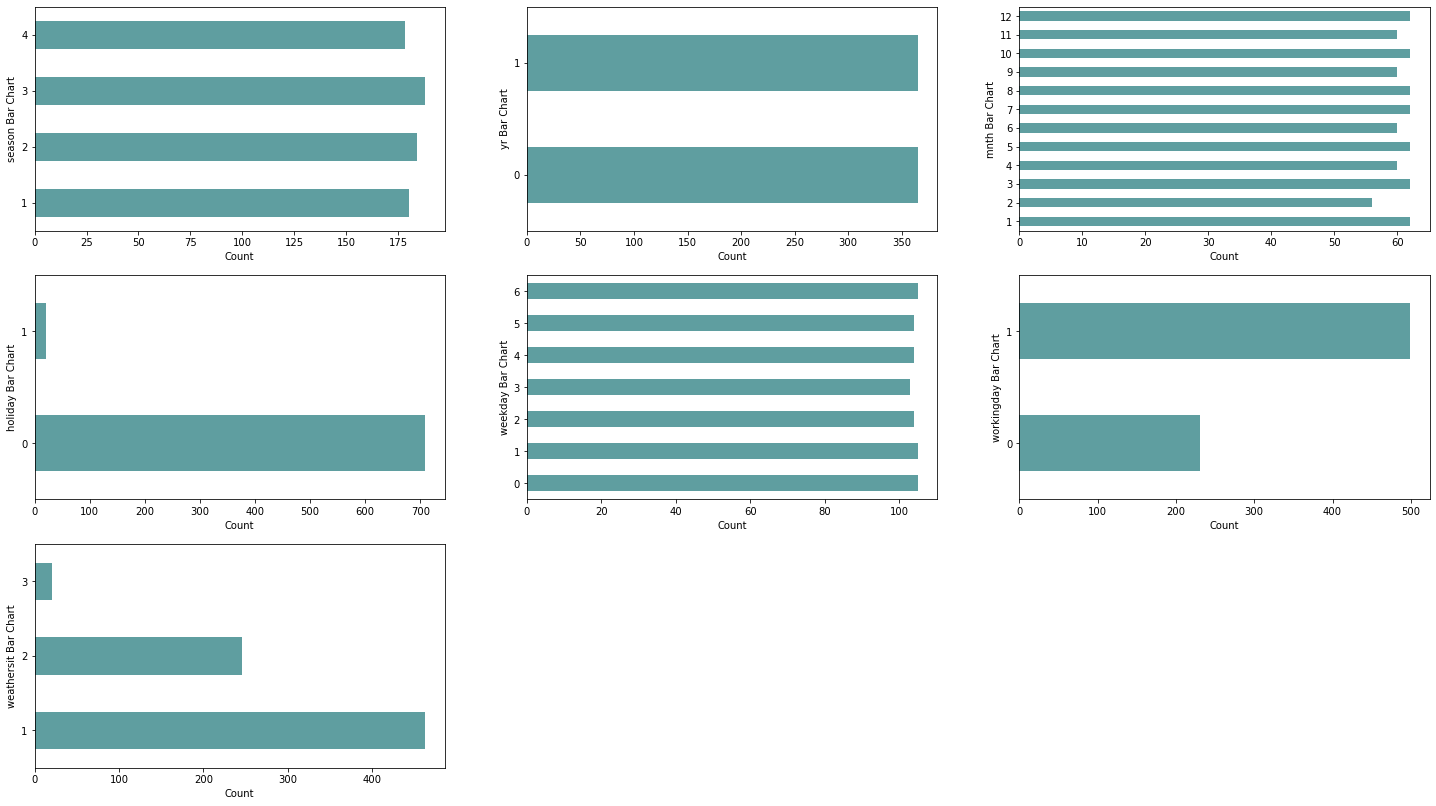

In [11]:
# Analysis of Numerical categorical features
numcat = list(bike_data.nunique().to_frame("count").query("count<13").index)
numcat
fig = plt.figure(figsize=(25,14))
j=1
for i in numcat:
    plt.subplot(3,3,j)
    df = bike_data[i].value_counts().to_frame("Count")
    #sns.barplot(x = "Count", y = df.index, orient ='h', data = df )
    bike_data[i].value_counts().sort_index().plot.barh(color ="cadetblue")
    j+=1
    plt.xlabel("Count")
    plt.ylabel(i+" Bar Chart")
    
plt.show()


#### <p> <span style="color : darkred"> <i> Subtask 1.3.1 Handling Categorical columns </i></span></p>

Creating Dummy variables for categorical features.

In [12]:
# As these columns are categorical lets create dummy variables representing column categories.
mapcols = {'season_1':'season_spring','season_2':'season_summer', 'season_3':'season_fall', 'season_4':'season_winter','yr_0':'yr_2018', 'yr_1':'yr_2019','mnth_1':"mnth_Jan", 'mnth_2':"mnth_Feb", 'mnth_3':"mnth_Mar",
       'mnth_4':"mnth_Apr", 'mnth_5':"mnth_May", 'mnth_6':"mnth_Jun", 'mnth_7':"mnth_Jul", 'mnth_8':"mnth_Aug", 'mnth_9':"mnth_Sep", 'mnth_10':"mnth_Oct",
       'mnth_11':"mnth_Nov", 'mnth_12':"mnth_Dec", 'weekday_0':"week_Sun",'weekday_1':"week_Mon", 'weekday_2':"week_Tue",
       'weekday_3':"week_Wed", 'weekday_4':"week_Thu", 'weekday_5':"week_Fri", 'weekday_6':"week_Sat", 'weathersit_1':"Clear_or_PartlyCloudy",'weathersit_2': "Misty_or_Cloudy", 'weathersit_3':"LightSnow_or_LightRain",'weathersit_4':"HeavySnow_or_HeavyRain"}

printCyan("Shape of DataFrame: {}".format(bike_data.shape))
# Removing holiday and working as these are singular variables of 0/1.
numcat.remove("holiday")
numcat.remove("workingday")
for i in numcat:
    df = pd.get_dummies(bike_data[i],prefix =i,drop_first=True) # we shall drop first to avoid multicolinearity
    bike_data = pd.concat([bike_data,df],axis=1)
    bike_data.drop(i,axis=1,inplace = True)
    printCyan("Shape of DataFrame: {}".format(bike_data.shape))

bike_data.rename(columns=mapcols, inplace=True)

  Shape of DataFrame: (730, 12)
  Shape of DataFrame: (730, 14)
  Shape of DataFrame: (730, 14)
  Shape of DataFrame: (730, 24)
  Shape of DataFrame: (730, 29)
  Shape of DataFrame: (730, 30)


In [13]:
printCyan(bike_data.columns)

  Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_summer', 'season_fall', 'season_winter', 'yr_2019', 'mnth_Feb',
       'mnth_Mar', 'mnth_Apr', 'mnth_May', 'mnth_Jun', 'mnth_Jul', 'mnth_Aug',
       'mnth_Sep', 'mnth_Oct', 'mnth_Nov', 'mnth_Dec', 'week_Mon', 'week_Tue',
       'week_Wed', 'week_Thu', 'week_Fri', 'week_Sat', 'Misty_or_Cloudy',
       'LightSnow_or_LightRain'],
      dtype='object')


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


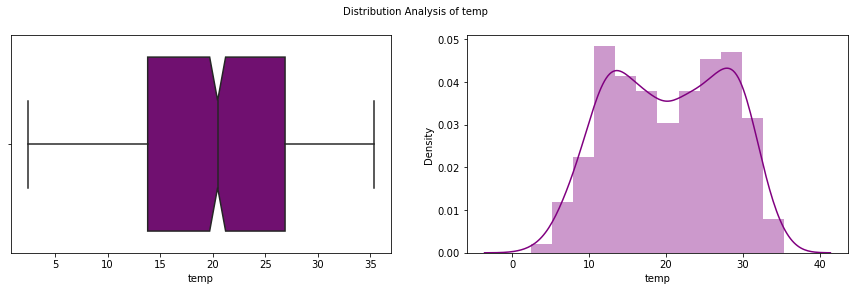

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


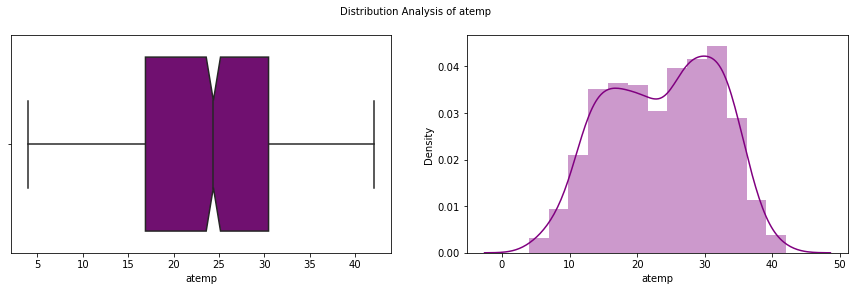

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


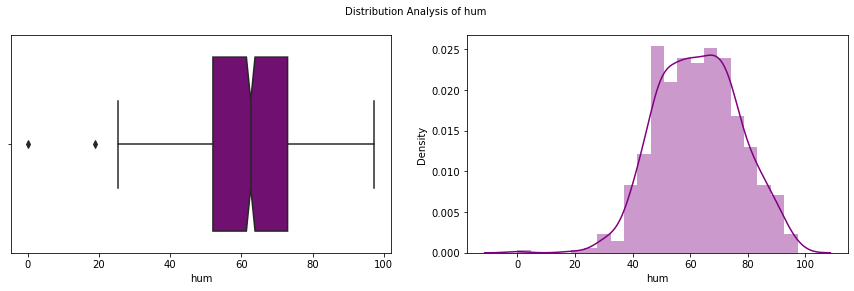

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


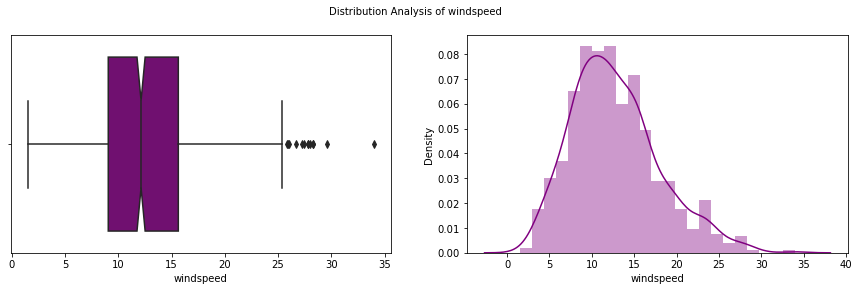

In [14]:
# Analysis of Numerical continuous features
numcot = list(bike_data.nunique().to_frame("count").query("count>10").index)
numcols = list(bike_data[numcot].select_dtypes(exclude= 'object').columns)
numcols.remove('cnt')
def numboxdist(i):
    
    fig = plt.figure(figsize=(15,4))
    fig.suptitle("Distribution Analysis of "+i, fontsize=10)   
    plt.subplot(1,2,1)
    sns.boxplot(x = bike_data[i],notch = True ,color="purple")
    plt.subplot(1,2,2)
    p1 = sns.distplot( bike_data[i],color="purple" )

    plt.show()

def NumericalDistr(i, plot):
    nullcount = bike_data[i].isnull().sum()
   
    if plot ==1:
        print("--"*120)
        numboxdist(i)
        
    meanv = bike_data[i].mean()
    medianv = bike_data[i].median()
    s = skew(bike_data[i], bias= False,nan_policy='omit')
    k = kurtosis(bike_data[i], bias=False,nan_policy='omit')
    dfnum.loc[len(dfnum.index)] = [i,nullcount,meanv, medianv, s,k]
    
dfnum = pd.DataFrame(columns=("columnname","Nullcount","Mean","Median","skew","kurtosis"))
for i in numcols:
    NumericalDistr(i,1)

In [15]:
printCyan(dfnum)


    columnname Nullcount       Mean     Median      skew  kurtosis
0       temp         0  20.319259  20.465826 -0.057187 -1.118305
1      atemp         0  23.726322  24.368225 -0.133709 -0.984513
2        hum         0  62.765175  62.625000 -0.067476 -0.059830
3  windspeed         0  12.763620  12.125325  0.676314  0.405909


###### <span style="color : darkgreen"> <b>Observations: </b> </span>  
<br>
<span style="color : purple">
<ol><li>
From above visualizations and statistcs it is identifiable that there are no highly skewed outliers in the data to be handled.
    </ol></li>
</span>

### <p> <span style="color : darkred"> <i> Subtask 1.7 Univariate, Bivariate and Multivariate Data Analysis </i></span></p>


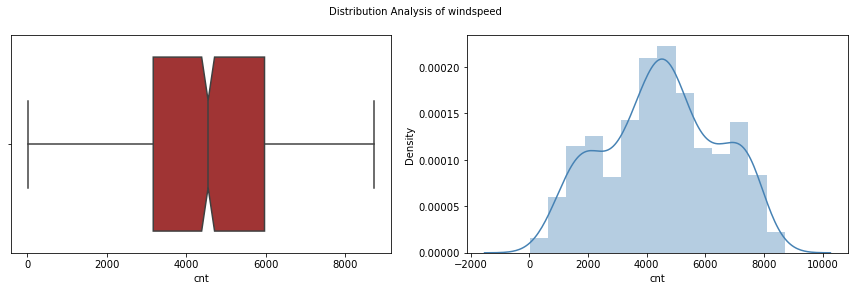

In [16]:
# Target variable analysis

fig = plt.figure(figsize=(15,4))
fig.suptitle("Distribution Analysis of "+i, fontsize=10)   
plt.subplot(1,2,1)
sns.boxplot(x = bike_data["cnt"] ,notch = True ,color="firebrick")
plt.subplot(1,2,2)
p1 = sns.distplot( bike_data["cnt"] ,color="steelblue" )
plt.show()

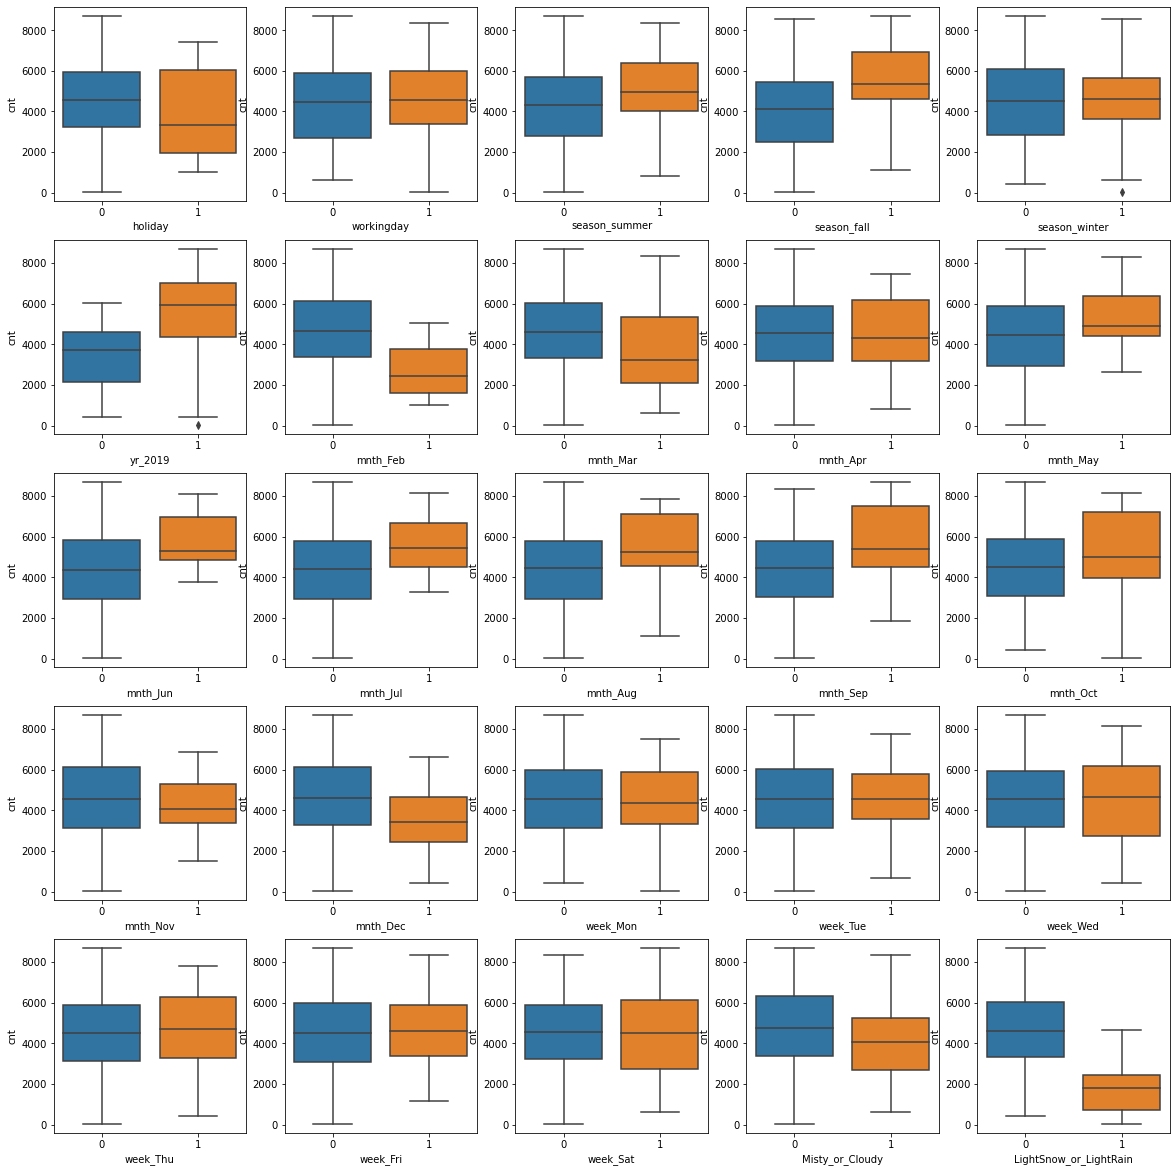

In [17]:
# analysis of various numerical categorical fetaures

numcot = list(bike_data.nunique().to_frame("count").query("count<10").index)
numcols = list(bike_data[numcot].select_dtypes(exclude= 'object').columns)
fig = plt.figure(figsize=(20,25))
j=1
for i in numcols:
    plt.subplot(6,5,j)
    df = bike_data[[i,'cnt']]
    sns.boxplot(x = i, y = 'cnt', data = df)
    j+=1
plt.show()

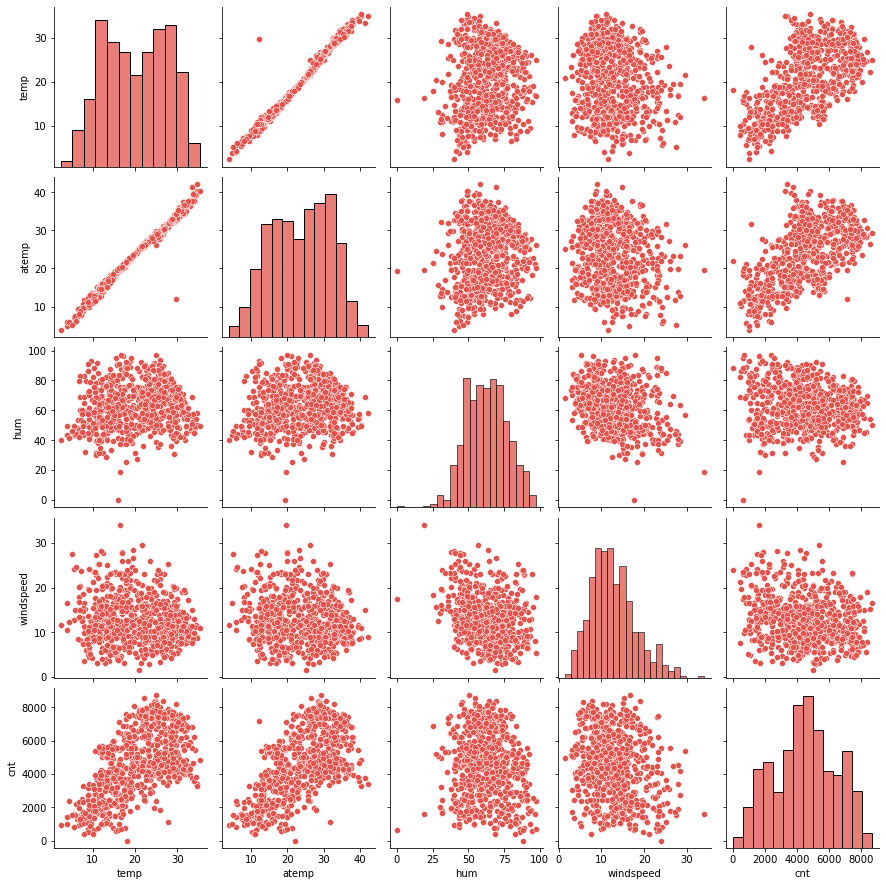

In [18]:
# analysis of various numerical cont. fetaures
numcot = list(bike_data.nunique().to_frame("count").query("count>10").index)
numcols = list(bike_data[numcot].select_dtypes(exclude= 'object').columns)

sns.set_palette("Spectral")
sns.pairplot(bike_data[numcols])
plt.show()

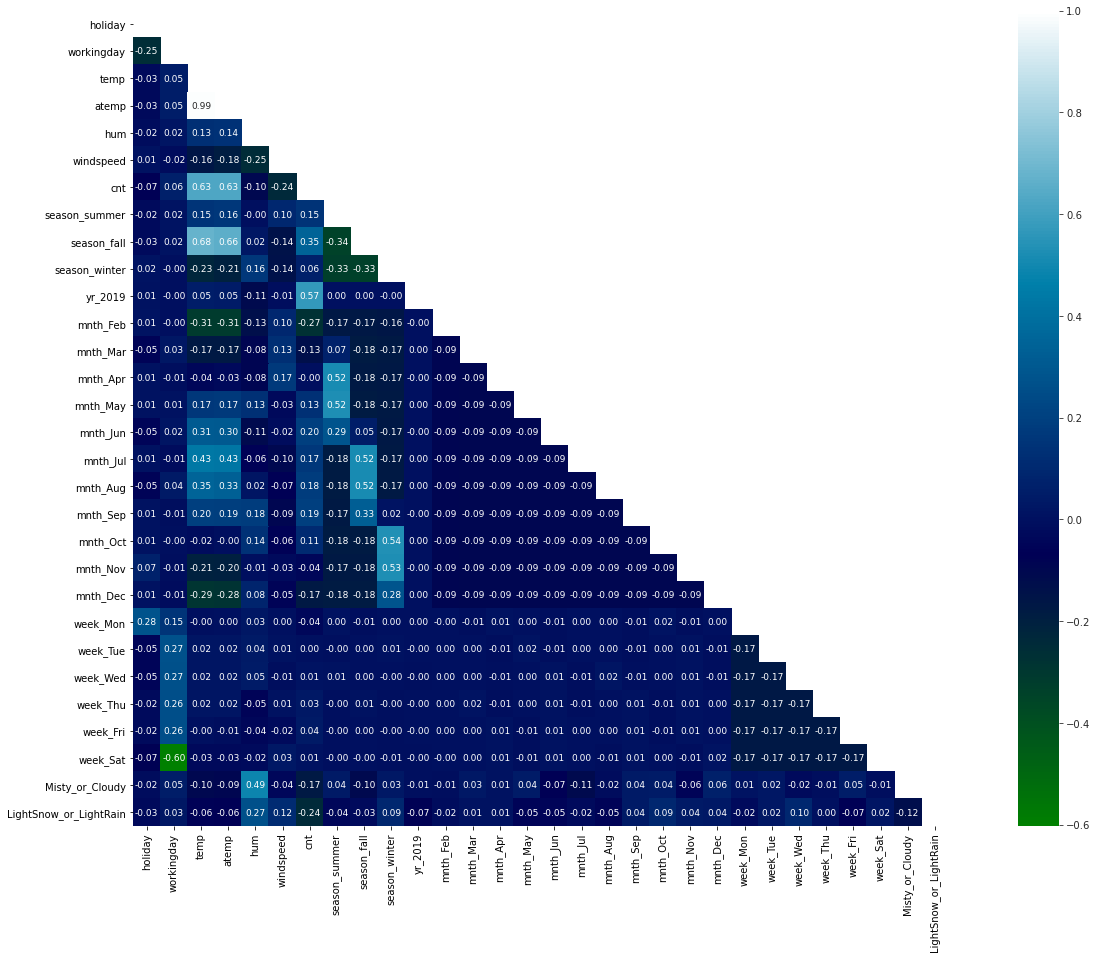

In [19]:
#Correlation

masklower = np.zeros_like(bike_data.corr()) #Masking values to get lower triangle
masklower[np.triu_indices_from(masklower)] = True
f, axes = plt.subplots(figsize =(25,15))
with sns.axes_style("white"):
    axes = sns.heatmap(bike_data.corr(),mask= masklower,annot=True, square =True ,vmax =1.0,annot_kws = {'size':9}, fmt=".2f", cmap ="ocean")
plt.show()


###### <span style="color : darkgreen"> <b>Observations: </b> </span>  
<br>
<span style="color : purple">
<ol><li>
From above visualizations, we can observe  some of features are highly correlated with Target variable--> cnt. </li>   <li>Also there is correlation among the features like temp with atemp. </li><li>Also july,december month has high positive and inverse correlations respectively with temp, atemp indicating high temperatures recorded at July month and lowest being at December which infact is correct. Same could be observed in demand, due to drop in temperatures may impact surroundings of customers and thereby its demand at spring and summer seasons.</li> <li> At yr_2019 high demand observed than 2018, similarly less demand present when raining. </li>   </ol>

</span>

## <span style='color:darkblue'> Task 2: Data Modeling </span>

### <p> <span style="color : darkred"> <i> Subtask 2.1 Train and Test Data Split </i></span></p>


In [20]:
np.random.seed(0) # to generate same samples on each time of seed
bike_train,bike_test = train_test_split(bike_data, train_size=0.7,random_state=100) # 70-30 split of train and test samples
print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(220, 30)


### <p> <span style="color : darkred"> <i> Subtask 2.2 Feature Scaling </i></span></p>

We can either choose min-max/Normalization or standardization  scalers to scale input features. Since min max values will reduce the range at greater extent, as of now we shall prefer it to improve optimization of cost function at faster rate

In [21]:
scaler=MinMaxScaler()
num_col = ['temp','atemp','hum','windspeed','cnt']
bike_train[num_col]=scaler.fit_transform(bike_train[num_col])
bike_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_Nov,mnth_Dec,week_Mon,week_Tue,week_Wed,week_Thu,week_Fri,week_Sat,Misty_or_Cloudy,LightSnow_or_LightRain
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,...,0,0,0,0,0,0,0,1,1,0
111,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,0,...,0,0,0,0,0,0,1,0,1,0


### <p> <span style="color : darkred"> <i> Subtask 2.3 Training the Model </i></span></p>


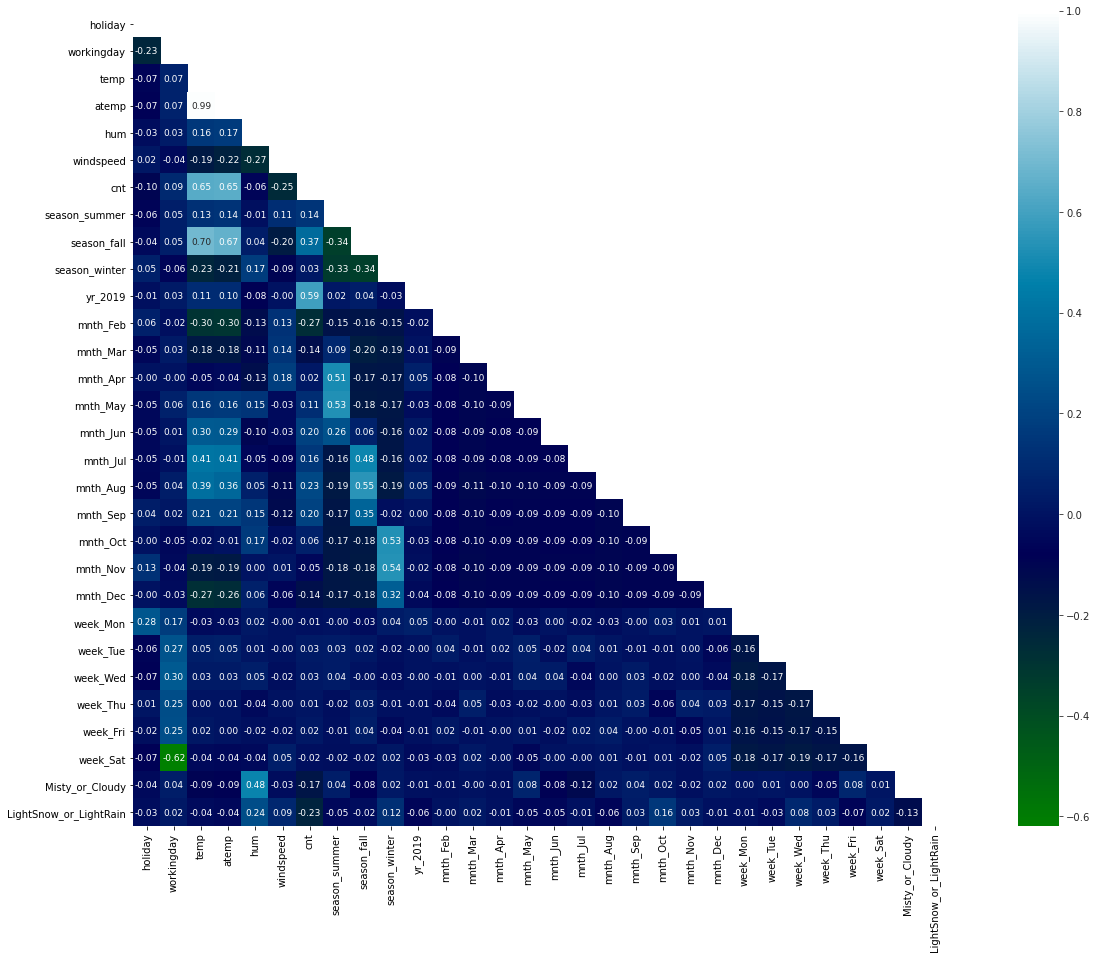

In [22]:
# plotting heatmap on train data to understand correlation
masklower = np.zeros_like(bike_train.corr()) #Masking values to get lower triangle
masklower[np.triu_indices_from(masklower)] = True
f, axes = plt.subplots(figsize =(25,15))
with sns.axes_style("white"):
    axes = sns.heatmap(bike_train.corr(),mask= masklower,annot=True, square =True ,vmax =1.0,annot_kws = {'size':9}, fmt=".2f", cmap ="ocean")
plt.show()

###### <span style="color : darkgreen"> <b>Observations: </b> </span>  
<br>
<span style="color : purple">
<ol><li>We could features like Mist_or_cloudy has correlation between hum, similarly week_sat has high inverse correlation between workingday.</li> <li>Season_fall also found to be related with Oct,nov and December months.</li></ol>

</span>

### <p> <span style="color : darkred"> <i> Subtask 2.3.1 Feature Selection </i></span></p>


In [23]:
# Dividing into X train and ytrain
ytrain = bike_train.pop("cnt")
Xtrain = bike_train
Xtrain.head()

,holiday,workingday,temp,atemp,hum,windspeed,season_summer,season_fall,season_winter,yr_2019,...,mnth_Nov,mnth_Dec,week_Mon,week_Tue,week_Wed,week_Thu,week_Fri,week_Sat,Misty_or_Cloudy,LightSnow_or_LightRain
576,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
728,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
111,0,1,0.345824,0.318819,0.751824,0.380981,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [24]:
ytrain.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

#### RFE
Let us use RFE(Recursive feature elimination) a automated approach to select features, as these are being of count 30. Better start with automated approach ie coarse tuning and follow fine tuning

In [25]:
# Lets choose 15 variables corresponding to 50%
lm=LinearRegression()
lm.fit(Xtrain,ytrain)
rfe = RFE(lm,15)
rfe=rfe.fit(Xtrain,ytrain)
printCyan(list(zip(Xtrain.columns,rfe.support_,rfe.ranking_)))

  [('holiday', True, 1), ('workingday', True, 1), ('temp', True, 1), ('atemp', False, 6), ('hum', True, 1), ('windspeed', True, 1), ('season_summer', True, 1), ('season_fall', True, 1), ('season_winter', True, 1), ('yr_2019', True, 1), ('mnth_Feb', False, 7), ('mnth_Mar', False, 2), ('mnth_Apr', False, 4), ('mnth_May', False, 3), ('mnth_Jun', False, 5), ('mnth_Jul', False, 8), ('mnth_Aug', True, 1), ('mnth_Sep', True, 1), ('mnth_Oct', True, 1), ('mnth_Nov', False, 9), ('mnth_Dec', False, 10), ('week_Mon', False, 11), ('week_Tue', False, 12), ('week_Wed', False, 14), ('week_Thu', False, 15), ('week_Fri', False, 13), ('week_Sat', True, 1), ('Misty_or_Cloudy', True, 1), ('LightSnow_or_LightRain', True, 1)]


In [26]:
col = list(Xtrain.columns[rfe.support_]) # List of columns supported by RFE
printCyan(col)
printGreen("--"*120)
colns= list(Xtrain.columns[~rfe.support_])
printCyan(colns)

  ['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_summer', 'season_fall', 'season_winter', 'yr_2019', 'mnth_Aug', 'mnth_Sep', 'mnth_Oct', 'week_Sat', 'Misty_or_Cloudy', 'LightSnow_or_LightRain']
  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  ['atemp', 'mnth_Feb', 'mnth_Mar', 'mnth_Apr', 'mnth_May', 'mnth_Jun', 'mnth_Jul', 'mnth_Nov', 'mnth_Dec', 'week_Mon', 'week_Tue', 'week_Wed', 'week_Thu', 'week_Fri']


### <p> <span style="color : darkred"> <i> Subtask 2.3.2 Building Model </i></span></p>
#### <p> <span style="color : purple"> <i>  Model 1 </i></span></p>


In [27]:
#Using statsmodel for detailed statistics

def modelbuildMLR(Xtrain_rfe):
    
    global vif
    #Implicitly stats model doesnt include constant of equation y =mx +c, so let us add this variable separately
    Xtrain_rfe = sm.add_constant(Xtrain_rfe)
    lm = sm.OLS(ytrain,Xtrain_rfe).fit()
    X = Xtrain_rfe
    vif['Features'] = X.columns
    vif['VIF']=[variance_inflation_factor(X.values ,i) for i in range(X.shape[1])]
    vif['VIF']= round(vif['VIF'],2)
    vif=vif.sort_values(by ='VIF', ascending=False)
    return lm

In [28]:
Xtrain_rfe1 =Xtrain[col]
vif =pd.DataFrame()
lm1 = modelbuildMLR(Xtrain_rfe1)
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.9
Date:                Mon, 01 Nov 2021   Prob (F-statistic):          5.17e-191
Time:                        21:25:39   Log-Likelihood:                 519.44
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1952      0.029      6.790      0.000       0.139       0.252
holiday                   -0.0545      0.027     -2.025      0.043      -0.107      -0.002
workingday                 0.0445      0.012      3.856      0.000       0.022       0.067
temp                       0.4972      0.034     14.821      0.000       0.431       0.563
hum                       -0.1639      0.037     -4.395      0.000      -0.237      -0.091
windspeed                 -0.1825      0.025     -7.196      0.000      -0.232      -0.133
season_summer              0.1183      0.015      8.038      0.000       0.089       0.147
season_fall                0.0292      0.022      1.329      0.184      -0.014       0.072
season_winter              0.1430      0.013     10.671      0.000       0.117       0.169
yr_2019                    0.2301      0.008     28.743      0.000       0.214       0.246
mnth_Aug                   0.0473      0.017      2.732      0.007       0.013       0.081
mnth_Sep                   0.1176      0.017      6.876      0.000       0.084       0.151
mnth_Oct                   0.0416      0.017      2.391      0.017       0.007       0.076
week_Sat                   0.0531      0.015      3.655      0.000       0.025       0.082
Misty_or_Cloudy           -0.0577      0.010     -5.564      0.000      -0.078      -0.037
LightSnow_or_LightRain    -0.2507      0.026     -9.579      0.000      -0.302      -0.199
==============================================================================
Omnibus:                       76.225   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.955
Skew:                          -0.743   Prob(JB):                     1.40e-44
Kurtosis:                       5.701   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
vif

,Features,VIF
0,const,53.48
7,season_fall,6.04
3,temp,3.71
6,season_summer,2.61
8,season_winter,2.16
4,hum,1.91
2,workingday,1.88
13,week_Sat,1.79
10,mnth_Aug,1.68
14,Misty_or_Cloudy,1.57


###### <span style="color : darkgreen"> <b>Observations: </b> </span>  
<br>
<span style="color : purple">
<ol><li>
Since p value for season_fall is 0.184 and VIF >5 , indicating less significance so let us drop this feature.</li></ol>
</span>

#### <p> <span style="color : purple"> <i>  Model 2 </i></span></p>


In [30]:
#From above model we could observe Season_Fall is insignificant with p value 0.184 >0.05 , so let us drop this feature.
vif =pd.DataFrame()
col.remove("season_fall")
Xtrain_rfe2 =Xtrain[col]
lm2 = modelbuildMLR(Xtrain_rfe2)
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Mon, 01 Nov 2021   Prob (F-statistic):          8.70e-192
Time:                        21:25:39   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1948      0.029      6.769      0.000       0.138       0.251
holiday                   -0.0557      0.027     -2.069      0.039      -0.109      -0.003
workingday                 0.0442      0.012      3.829      0.000       0.022       0.067
temp                       0.5309      0.022     24.146      0.000       0.488       0.574
hum                       -0.1708      0.037     -4.620      0.000      -0.243      -0.098
windspeed                 -0.1858      0.025     -7.353      0.000      -0.235      -0.136
season_summer              0.1049      0.011      9.778      0.000       0.084       0.126
season_winter              0.1349      0.012     11.306      0.000       0.111       0.158
yr_2019                    0.2292      0.008     28.712      0.000       0.214       0.245
mnth_Aug                   0.0557      0.016      3.457      0.001       0.024       0.087
mnth_Sep                   0.1252      0.016      7.757      0.000       0.093       0.157
mnth_Oct                   0.0385      0.017      2.230      0.026       0.005       0.072
week_Sat                   0.0527      0.015      3.627      0.000       0.024       0.081
Misty_or_Cloudy           -0.0568      0.010     -5.482      0.000      -0.077      -0.036
LightSnow_or_LightRain    -0.2470      0.026     -9.484      0.000      -0.298      -0.196
==============================================================================
Omnibus:                       70.710   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.743
Skew:                          -0.710   Prob(JB):                     4.18e-39
Kurtosis:                       5.511   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# Since other features were in limits of p value, impliying their signficance on target. Let us measure it through VIF to optimize model
vif

,Features,VIF
0,const,53.47
2,workingday,1.88
4,hum,1.87
12,week_Sat,1.79
7,season_winter,1.71
3,temp,1.59
13,Misty_or_Cloudy,1.56
11,mnth_Oct,1.49
9,mnth_Aug,1.46
6,season_summer,1.38


###### <span style="color : darkgreen"> <b>Observations: </b> </span>  
<br>
<span style="color : purple">
    <ol><li>Dropping Season_fall is good idea as there is no significant drop in predictive power ie adjusted R2 and AIC, also f statistic increased, therefore clearly it is a redundant variable.
Also there is no change in coefficient signs.</li>
        <li>Here we could see variance inflation values with respect to Features is less than 2 and p values less than 0.05, making a good model.</li>
<li>Though above model is very suitable to finalize, but let us remove some of features and understand various models.</li>  </ol>

</span>



#### <p> <span style="color : purple"> <i>  Model 3 </i></span></p>


In [32]:
vif =pd.DataFrame()
col.remove("holiday")
Xtrain_rfe3 =Xtrain[col]
lm3 = modelbuildMLR(Xtrain_rfe3)
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.0
Date:                Mon, 01 Nov 2021   Prob (F-statistic):          4.92e-192
Time:                        21:25:39   Log-Likelihood:                 516.33
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     496   BIC:                            -945.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1850      0.028      6.497      0.000       0.129       0.241
workingday                 0.0525      0.011      4.832      0.000       0.031       0.074
temp                       0.5325      0.022     24.152      0.000       0.489       0.576
hum                       -0.1698      0.037     -4.578      0.000      -0.243      -0.097
windspeed                 -0.1866      0.025     -7.362      0.000      -0.236      -0.137
season_summer              0.1056      0.011      9.817      0.000       0.084       0.127
season_winter              0.1341      0.012     11.212      0.000       0.111       0.158
yr_2019                    0.2294      0.008     28.640      0.000       0.214       0.245
mnth_Aug                   0.0561      0.016      3.469      0.001       0.024       0.088
mnth_Sep                   0.1235      0.016      7.635      0.000       0.092       0.155
mnth_Oct                   0.0398      0.017      2.297      0.022       0.006       0.074
week_Sat                   0.0611      0.014      4.365      0.000       0.034       0.089
Misty_or_Cloudy           -0.0565      0.010     -5.438      0.000      -0.077      -0.036
LightSnow_or_LightRain    -0.2462      0.026     -9.424      0.000      -0.298      -0.195
==============================================================================
Omnibus:                       75.917   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.075
Skew:                          -0.745   Prob(JB):                     9.74e-44
Kurtosis:                       5.665   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
vif

,Features,VIF
0,const,52.04
3,hum,1.87
6,season_winter,1.71
1,workingday,1.66
11,week_Sat,1.65
2,temp,1.59
12,Misty_or_Cloudy,1.56
10,mnth_Oct,1.48
8,mnth_Aug,1.46
5,season_summer,1.38


###### <span style="color : darkgreen"> <b>Observations: </b> </span>  
<br>
<span style="color : purple">
    <ol><li>From above statistics we could observe fstatistic improved a bit also there is no significant drop in Adjusted R2.
Let us penalise/drop some other features as well to avoid model complexity and overfit.</li>  </ol>

</span>


#### <p> <span style="color : purple"> <i>  Model 4</i></span></p>


In [34]:
vif =pd.DataFrame()
col.remove("mnth_Oct")
Xtrain_rfe4 =Xtrain[col]
lm4 = modelbuildMLR(Xtrain_rfe4)


In [35]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     225.1
Date:                Mon, 01 Nov 2021   Prob (F-statistic):          4.37e-192
Time:                        21:25:39   Log-Likelihood:                 513.63
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     497   BIC:                            -946.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1780      0.028      6.260      0.000       0.122       0.234
workingday                 0.0517      0.011      4.745      0.000       0.030       0.073
temp                       0.5415      0.022     24.855      0.000       0.499       0.584
hum                       -0.1653      0.037     -4.444      0.000      -0.238      -0.092
windspeed                 -0.1833      0.025     -7.212      0.000      -0.233      -0.133
season_summer              0.1038      0.011      9.632      0.000       0.083       0.125
season_winter              0.1472      0.011     13.943      0.000       0.126       0.168
yr_2019                    0.2291      0.008     28.482      0.000       0.213       0.245
mnth_Aug                   0.0526      0.016      3.254      0.001       0.021       0.084
mnth_Sep                   0.1176      0.016      7.332      0.000       0.086       0.149
week_Sat                   0.0605      0.014      4.306      0.000       0.033       0.088
Misty_or_Cloudy           -0.0561      0.010     -5.377      0.000      -0.077      -0.036
LightSnow_or_LightRain    -0.2408      0.026     -9.215      0.000      -0.292      -0.189
==============================================================================
Omnibus:                       67.727   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.278
Skew:                          -0.685   Prob(JB):                     4.74e-37
Kurtosis:                       5.449   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
vif

,Features,VIF
0,const,51.44
3,hum,1.87
1,workingday,1.65
10,week_Sat,1.65
11,Misty_or_Cloudy,1.56
2,temp,1.54
8,mnth_Aug,1.44
5,season_summer,1.37
6,season_winter,1.32
12,LightSnow_or_LightRain,1.24


#### <p> <span style="color : purple"> <i>  Model 5</i></span></p>


In [37]:
# If we see there is any Multicolinearity among features like hum and Misty_or_Cloudy, so let us drop one of them.
vif =pd.DataFrame()
col.remove("hum")
Xtrain_rfe5 =Xtrain[col]
lm5 = modelbuildMLR(Xtrain_rfe5)
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.9
Date:                Mon, 01 Nov 2021   Prob (F-statistic):          4.31e-189
Time:                        21:25:39   Log-Likelihood:                 503.70
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     498   BIC:                            -932.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0809      0.019      4.365      0.000       0.045       0.117
workingday                 0.0546      0.011      4.926      0.000       0.033       0.076
temp                       0.5208      0.022     24.022      0.000       0.478       0.563
windspeed                 -0.1518      0.025     -6.105      0.000      -0.201      -0.103
season_summer              0.1010      0.011      9.220      0.000       0.080       0.123
season_winter              0.1379      0.011     13.083      0.000       0.117       0.159
yr_2019                    0.2328      0.008     28.578      0.000       0.217       0.249
mnth_Aug                   0.0512      0.016      3.111      0.002       0.019       0.084
mnth_Sep                   0.1117      0.016      6.864      0.000       0.080       0.144
week_Sat                   0.0653      0.014      4.576      0.000       0.037       0.093
Misty_or_Cloudy           -0.0826      0.009     -9.474      0.000      -0.100      -0.065
LightSnow_or_LightRain    -0.2860      0.025    -11.664      0.000      -0.334      -0.238
==============================================================================
Omnibus:                       65.886   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.448
Skew:                          -0.676   Prob(JB):                     3.92e-35
Kurtosis:                       5.373   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
vif

,Features,VIF
0,const,21.09
1,workingday,1.65
9,week_Sat,1.64
2,temp,1.47
7,mnth_Aug,1.44
4,season_summer,1.37
5,season_winter,1.27
8,mnth_Sep,1.20
3,windspeed,1.09
10,Misty_or_Cloudy,1.05


#### <p> <span style="color : purple"> <i>  Model 6 </i></span></p>


In [39]:
#Let us drop Mnth_Aug to avoid complexity and overfit of model
vif =pd.DataFrame()
col.remove("mnth_Aug")
Xtrain_rfe6 =Xtrain[col]
lm6 = modelbuildMLR(Xtrain_rfe6)
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Mon, 01 Nov 2021   Prob (F-statistic):          3.13e-188
Time:                        21:25:39   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0750      0.019      4.031      0.000       0.038       0.112
workingday                 0.0561      0.011      5.024      0.000       0.034       0.078
temp                       0.5499      0.020     27.861      0.000       0.511       0.589
windspeed                 -0.1552      0.025     -6.195      0.000      -0.204      -0.106
season_summer              0.0886      0.010      8.608      0.000       0.068       0.109
season_winter              0.1307      0.010     12.600      0.000       0.110       0.151
yr_2019                    0.2331      0.008     28.370      0.000       0.217       0.249
mnth_Sep                   0.0974      0.016      6.184      0.000       0.066       0.128
week_Sat                   0.0675      0.014      4.693      0.000       0.039       0.096
Misty_or_Cloudy           -0.0800      0.009     -9.143      0.000      -0.097      -0.063
LightSnow_or_LightRain    -0.2871      0.025    -11.611      0.000      -0.336      -0.239
==============================================================================
Omnibus:                       68.639   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.839
Skew:                          -0.731   Prob(JB):                     1.07e-33
Kurtosis:                       5.238   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### <span style="color : darkgreen"> <b>Observations: </b> </span>  
<br>
<span style="color : purple">
    <ol><li>R2 and Adjusted R2 nearby, indicating there are no reduntant terms.</li>
        <li> Model power-F statistic increased , p value lies in acceptance limit i.e. less than 0.05 and no change in coefficients signs after drop of variable. Hence we shall finalize these model features and stop further feature optimization.</li>  </ol>

</span>


### <p> <span style="color : darkred"> <i> Subtask 2.4 Residual Analysis </i></span></p>


In [41]:
# 
Xtrain_rfe6 = sm.add_constant(Xtrain_rfe6)
ytrain_cntpred = lm6.predict(Xtrain_rfe6)

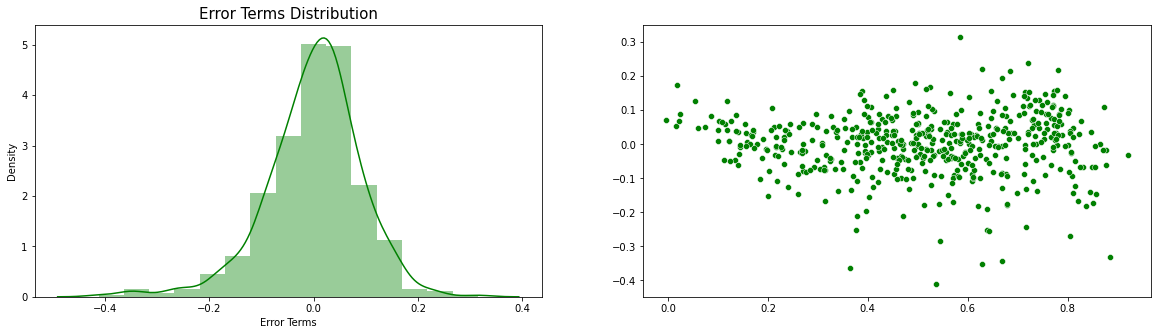

In [42]:
f = plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot((ytrain - ytrain_cntpred), bins = 15,color="green")
plt.title('Error Terms Distribution', fontsize = 15) 
plt.xlabel('Error Terms', fontsize = 10)  
plt.subplot(1,2,2)
sns.scatterplot(x=ytrain_cntpred,y=ytrain - ytrain_cntpred,color="green")
plt.show()


#### <span style="color : darkgreen"> <b>Observations: </b> </span>  
<br>
<span style="color : purple"> We could see above visualizations satisfy the assumptions of Linear Regression:
<ol><li> Error terms are normally distributed and zero mean. </li> 
    <li> Error terms are independent and no observable pattern found</li></ol>

</span>

### <p> <span style="color : darkred"> <i> Subtask 2.5  Make Predictions </i></span></p>


In [43]:
# using scaler of  train to scale features in test dataset.
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_test[num_vars]=scaler.transform(bike_test[num_vars])

In [44]:
bike_test.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_Nov,mnth_Dec,week_Mon,week_Tue,week_Wed,week_Thu,week_Fri,week_Sat,Misty_or_Cloudy,LightSnow_or_LightRain
184,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,0,...,0,0,1,0,0,0,0,0,1,0
535,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,1,0,0,1,0
221,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [45]:
# Dividing x and y test
ytest = bike_test.pop('cnt')
Xtest = bike_test
Xtest.head()

,holiday,workingday,temp,atemp,hum,windspeed,season_summer,season_fall,season_winter,yr_2019,...,mnth_Nov,mnth_Dec,week_Mon,week_Tue,week_Wed,week_Thu,week_Fri,week_Sat,Misty_or_Cloudy,LightSnow_or_LightRain
184,1,0,0.831783,0.769660,0.657364,0.084219,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
535,0,1,0.901354,0.842587,0.610133,0.153728,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
299,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
221,0,1,0.881625,0.795343,0.437098,0.339570,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,1,0.817246,0.741471,0.314298,0.537414,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [46]:
Xtest_new = Xtest[col]
Xtest_new = sm.add_constant(Xtest_new)
Xtest_new.head()

,const,workingday,temp,windspeed,season_summer,season_winter,yr_2019,mnth_Sep,week_Sat,Misty_or_Cloudy,LightSnow_or_LightRain
184,1.0,0,0.831783,0.084219,0,0,0,0,0,1,0
535,1.0,1,0.901354,0.153728,1,0,1,0,0,0,0
299,1.0,1,0.511964,0.334206,0,1,0,0,0,1,0
221,1.0,1,0.881625,0.339570,0,0,0,0,0,0,0
152,1.0,1,0.817246,0.537414,1,0,0,0,0,0,0


In [47]:
ytest_cntpred = lm6.predict(Xtest_new)
# find r2 score on test data
printCyan("R2 score on Test Dataset: {:.2f}%".format(r2_score(y_true= ytest ,y_pred=ytest_cntpred)*100))

  R2 score on Test Dataset: 79.61%


### <p> <span style="color : darkred"> <i> Subtask 2.5  Model Evaluation </i></span></p>


##### Lets chcek assumptions of MLR
1. Lineraity of Model



In [48]:
eq = []
for i in range(len(lm.params)):
    s = f"{round(lm.params[i],3)} X {lm.params.index[i]}"
    if lm.params.index[i] =="const":
        s = f"{round(lm.params[i],3)}"
    eq.append(s)
printGreen("\nFinal Best fit Regresssion Model Equation:\n y = "+' + '.join(eq))

AttributeError: 'LinearRegression' object has no attribute 'params'

From above we could observe model is in the form of plan equation and this equation explains 80% of data (From test r2 score) implies efficient model.

2. Multivariate of Model

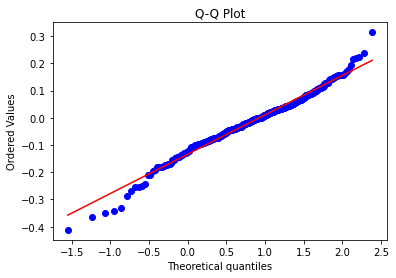

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(ytrain- ytrain_cntpred, dist=stats.loggamma, sparams=(3,), plot=ax)
ax.set_title("Q-Q Plot")
plt.show()
plt.show()

Distribution of residuals is normal.

3. No Multicolinearity
From Vif values of features we could confirm there is no multicolinearity between variables.

In [50]:
np.mean(ytrain-ytrain_cntpred) ## really small near to zero

-4.442524779419193e-16

In [51]:
vif

,Features,VIF
0,const,20.86
1,workingday,1.65
8,week_Sat,1.63
5,season_winter,1.21
2,temp,1.20
4,season_summer,1.19
7,mnth_Sep,1.10
3,windspeed,1.09
10,LightSnow_or_LightRain,1.05
9,Misty_or_Cloudy,1.04


4 . Homoscedasticity:

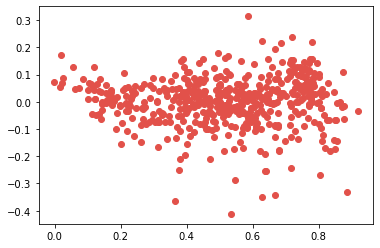

In [52]:
plt.scatter(ytrain_cntpred, ytrain-ytrain_cntpred)

In [53]:
# From plot we could observe there is no pattern in residuals indicating error terms independent

5. No Autocorrelation

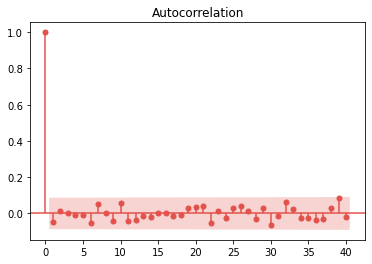

In [54]:
acf= sm.graphics.tsa.plot_acf(ytrain-ytrain_cntpred,lags =40)
acf.show()

In [55]:
# There is no value /peak that crosses significant boundary/shadow indicating no autocorrelation

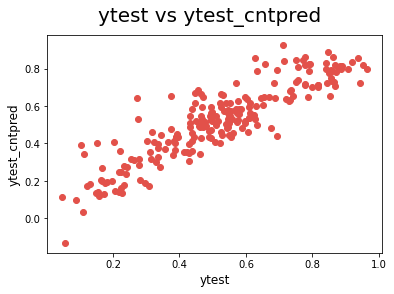

In [56]:
# plotting ytest and ytest_cntpred to understand the spread
fig = plt.figure()
plt.scatter(ytest,ytest_cntpred)
fig.suptitle('ytest vs ytest_cntpred', fontsize=20)          
plt.xlabel('ytest', fontsize=12)                          
plt.ylabel('ytest_cntpred', fontsize=12)  
plt.show()

#### <span style="color : darkgreen"> <b>Summary: </b> </span>  
<br>
<span style="color : purple">
    <ol><li> R2 of Train to Test is 83.5% to 79.61% , from scatter plot between actual and predicted indicates values are similar.Therefore can confirm Model to be efficient.  </li><li>Features windspeed, Misty_or_Cloudy and LightSnow_or_LightRain has inverse effect on Demand. This is observed scenario, at conditions of high winds and high rain people often tend to travel less.  </li>
<li> Features workingday, temp ,season_summer, season_winter , yr_2019, mnth_Aug, mnth_Sep and week_Sat has direct effect on Demand.   </li> <li>  Temp feature has the highest coefficient value indiating rate of change in temp will have high change in target. Similarly LightSnow_or_LightRain and yr_2019 indicating higher effect or significance on target  </li> </ol>

</span>